# Dependencies

In [14]:
# setup gui for matplotlib interactive plots - move to bookeh lateron
%matplotlib inline
%run acquisition_dependencies.py

warnings.filterwarnings("ignore")

Traceback (most recent call last):
  File "/home/pi/berryconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/home/pi/berryconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/home/pi/berryconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1560, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


*Test LED switching before anything else*

# Settings # 
*Spectrometer*

In [5]:
%run modules/MyOpticsLab.py


 Hello pi! Welcome to LabOptica :)

 The following Ocean Optics devices have been recognized:
[<SeaBreezeDevice USB2000PLUS:USB2+H02391>]

 Connected to USB2000plusXR


interactive(children=(RadioButtons(description='devices', options=('USB2000plusXR',), value='USB2000plusXR'), Checkbox(value=False, description='light'), Output()), _dom_classes=('widget-interact',))

In [6]:
detector = OO['USB2000plusXR']

*LEDs*

In [8]:
sensors = {'left':
               {'GPIO-pin':23, 'IT':3000}, 
           
           'right':
               {'GPIO-pin':24, 'IT':3000}
          }

*Summarize settings to pass to Measurement instance*

In [20]:
settings = {'experiment': 'TwinChips_X2_Calibration20181122_Red',
          'detector':detector.name,
          'sensors':sensors,
          'dir': os.getcwd()+'/' + 'TwinChips' +'/'}

# Initiate Calibration

*Create Instance of Measurement*

In [21]:
Calibration = Measurement(OO, **settings)

*Test LED intensities*

<IPython.core.display.Javascript object>


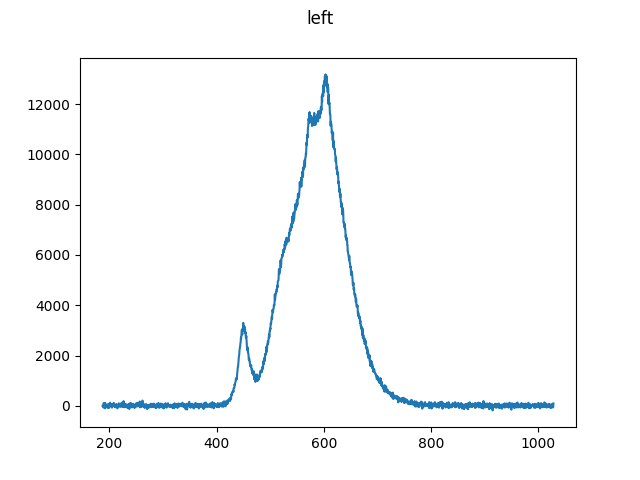

<IPython.core.display.Javascript object>


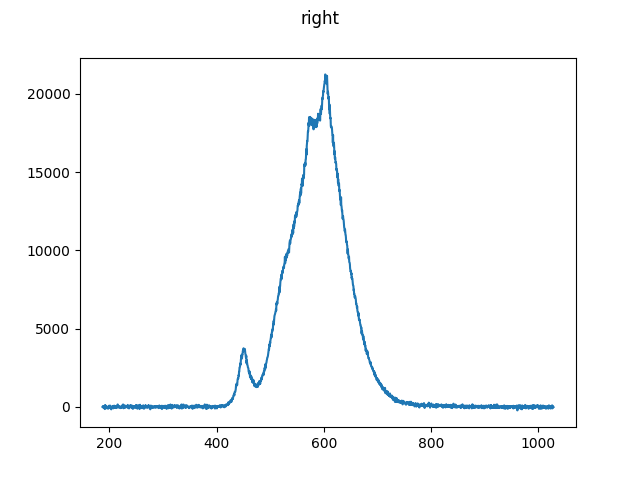

In [39]:
Calibration.test_intensities(1)

In [37]:
help(Calibration.save_intensities)

Help on method save_intensities in module modules.MyMeasurement:

save_intensities(label, N, as_txt=False, confirm=False) method of modules.MyMeasurement.Measurement instance



*Define concentrations*

### Pelikan Green

In [11]:
v_diG = np.array([0.15, 
                  0.075, 
                  0.0375, 
                  0.025, 
                  0.01875, 
                  0.015, 
                  0.01, 
                  0.])

c_d1G = 5
v_tot = 1.5
c_diG = v_diG*c_d1G/v_tot
print('Volums of Dilution 1:', v_diG, 'mL')
print('Volumns of H2O to add:', v_tot-v_diG, 'mL')

Volums of Dilution 1: [ 0.15     0.075    0.0375   0.025    0.01875  0.015    0.01     0.     ] mL
Volumns of H2O to add: [ 1.35     1.425    1.4625   1.475    1.48125  1.485    1.49     1.5    ] mL


### Pelikan Red

In [17]:
v_diR = 2*np.array([0.15, 
                  0.075, 
                  0.0375, 
                  0.025, 
                  0.01875, 
                  0.015, 
                  0.01, 
                  0.])
c_d1R = 10
v_tot = 1.5
c_diR = v_diR*c_d1R/v_tot
print('Volums of Dilution 1:', v_diR, 'mL')
print('Volumns of H2O to add:', v_tot-v_diR, 'mL')

Volums of Dilution 1: [ 0.3     0.15    0.075   0.05    0.0375  0.03    0.02    0.    ] mL
Volumns of H2O to add: [ 1.2     1.35    1.425   1.45    1.4625  1.47    1.48    1.5   ] mL


*Start Calibration*

confirm to measure 0.0 U/mL
confirm to measure 0.133 U/mL
confirm to measure 0.2 U/mL
confirm to measure 0.25 U/mL
confirm to measure 0.333 U/mL
confirm to measure 0.5 U/mL
confirm to measure 1.0 U/mL
confirm to measure 2.0 U/mL


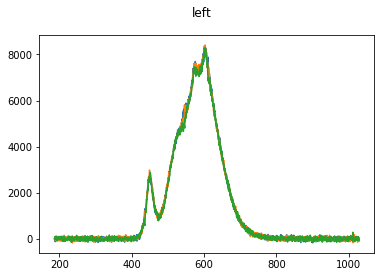

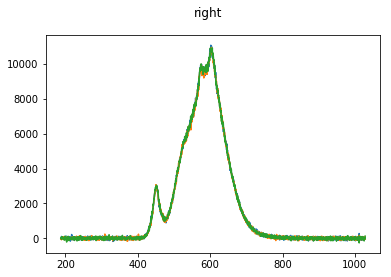

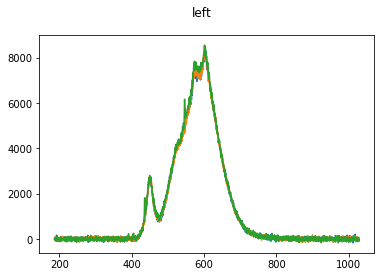

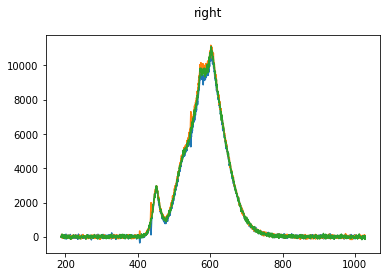

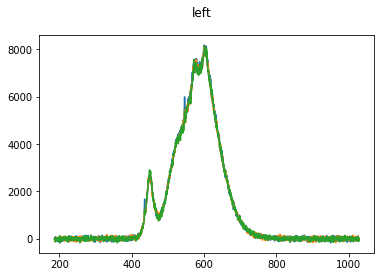

In [ ]:
for concentration in c_diR[::-1] :
    try:
        #convert number (float) to 'string'
        c_str = str(round(concentration, 3))
        # wait for user confirmation to proceed
        input('confirm to measure ' + c_str + ' U/mL')
        # Execute data acquisition
        Calibration.save_intensities(concentration, 3)
        
    except KeyboardInterrupt:
        print('stopped.')

**For later use:** *set parameters for periodic data acquisition and back them up*

*start automatic data acquisition*